Yes, I remember. Your data represents the times in hours when users accessed a banking app. This is time series data, but each user can have a different number of access times, so the time series can be of different lengths.

Given the nature of your data, you might consider using clustering methods that can handle sequences of varying lengths. Here are a few suggestions:

1. **K-Medoids**: This is a variation of K-Means that is more robust to outliers and can work with arbitrary distance metrics. You could use a distance metric that is appropriate for sequences of varying lengths, such as Dynamic Time Warping (DTW) or Longest Common Subsequence (LCSS).

2. **Hierarchical Clustering**: This method builds a hierarchy of clusters by repeatedly merging the closest pair of clusters. It can work with arbitrary distance metrics, so you could use it with DTW or LCSS.

3. **DBSCAN or HDBSCAN**: These are density-based clustering methods that can find clusters of arbitrary shapes. They can work with arbitrary distance metrics, and HDBSCAN can even find clusters of varying densities.

4. **Sequence Vector Embedding**: Another approach is to transform your sequences into fixed-length vectors using an embedding method, such as Word2Vec or Doc2Vec, and then use any standard clustering method on the embedded vectors.

Remember that the choice of clustering method depends on the specific requirements of your analysis and the characteristics of your data. It's often a good idea to try multiple methods and see which one works best for your data.

Hierarchical Clustering with DTW: Hierarchical clustering is a versatile clustering algorithm that can be used with DTW as a distance metric to handle variable-length sequences effectively.

KShape: KShape is a variant of KMeans specifically designed for time series data. It clusters time series based on their shapes using DTW as a distance measure.

HDBSCAN: HDBSCAN is a density-based clustering algorithm that can handle variable-length sequences by using a robust density estimation technique. It does not require specifying the number of clusters in advance.

DBSCAN with DTW: DBSCAN is another density-based clustering algorithm that can be adapted to handle variable-length sequences by using DTW as a distance metric.

OPTICS with DTW: OPTICS is an extension of DBSCAN that produces a hierarchical clustering based on density reachability. Similar to DBSCAN, it can be combined with DTW to handle variable-length sequences.

# Clustering tests:

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
from sklearn.metrics import silhouette_score
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from tslearn.metrics import dtw
from tslearn.clustering import KShape
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from tslearn.metrics import dtw
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


## 4.1)Clustering using features not raw data:

#### Cuales son los mejores features que puedo tomar:

When clustering users based on their data, especially time-series data as in your case, you can consider various features to capture different aspects of their behavior. Here are some additional features you might find useful:

1. **Quantiles**: Compute various quantiles (e.g., 25th, 50th, and 75th percentiles) to capture different points of distribution.
   
2. **Interquartile Range (IQR)**: Measure of statistical dispersion, useful for detecting outliers.
   
3. **Skewness and Kurtosis**: Measure the asymmetry and peakedness of the distribution respectively, providing insights into the shape of the distribution.
   
4. **Autocorrelation**: Measure the correlation between the time series and lagged versions of itself, capturing temporal dependencies.
   
5. **Seasonality Indicators**: Extract features indicating seasonal patterns, such as Fourier transformations or seasonal decomposition techniques.
   
6. **Change Points**: Identify points in the time series where there are significant changes, which could indicate shifts in behavior or trends.
   
7. **Frequency Domain Features**: Use techniques like Fourier or Wavelet transformations to extract frequency domain characteristics of the time series.
   
8. **Entropy Measures**: Quantify the randomness or predictability of the time series, such as Shannon entropy.
   
9. **Cross-correlation with External Factors**: If available, include features that capture relationships with external factors that might influence the behavior, such as weather data, economic indicators, etc.
   
10. **Time Series Models Parameters**: If you have expertise in time series modeling, you can extract parameters from models like ARIMA, SARIMA, or exponential smoothing methods.

These additional features can provide richer representations of the users' behavior, leading to more informative clusters. Experimenting with different combinations of features and clustering algorithms can help you identify meaningful patterns in your data.

In [1]:
hour_dict= {
    'user1': np.array([100, 200, 300, 400, 500]),
    'user2': np.array([1, 4, 9, 16]),
    'user3': np.array([3, 6, 9, 12, 15]),
    'user4': np.array([100, 105, 120, 98, 99])
}
# Feature extraction
features = []
for user, data in hour_dict.items():
    histogram, _ = np.histogram(data, bins=168)#TODOS CON EL MISMO NUMERO DE BINS
    mean_hist = np.mean(histogram)
    std_hist = np.std(histogram)
    quantiles = np.percentile(data, [25, 50, 75])
    skewness = skew(data)
    kurt = kurtosis(data)
    features.append([mean_hist, std_hist, *quantiles, skewness, kurt])
    
# Feature extraction: For simplicity, let's use mean and standard deviation of each user's data and kmeans clustering
features = []#cada elemento es una lista de dos elementos, el promedio y la desviacion estandar
for user, data in hour_dict.items():
    histogram, _ = np.histogram(data, bins=168)
    features.append([np.mean(histogram), np.std(histogram)])



# Extract standard deviations
std_devs = [feature[1] for feature in features]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(std_devs, bins=25)
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of Standard Deviations')
plt.grid(True)

# Extract means
means = [feature[0] for feature in features]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(means, bins=30)
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Means')
plt.grid(True)
plt.show()
plt.show()



NameError: name 'np' is not defined

### 4.1.1)Como no siguen una distribucion Gaussiana se recomineda usar normalizacion 

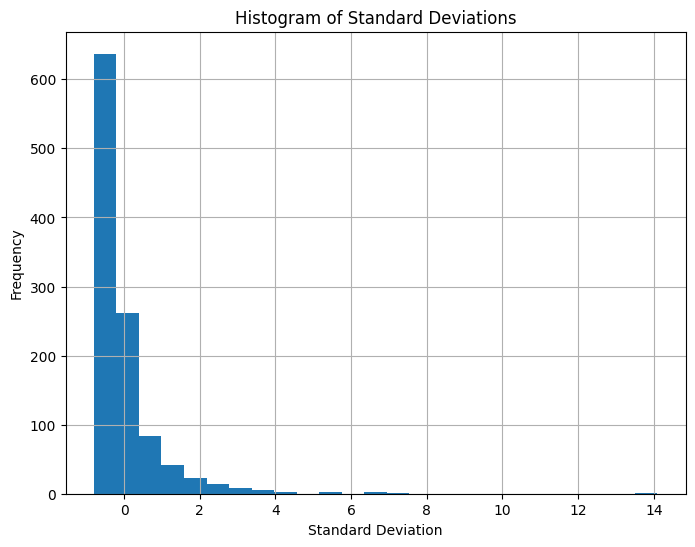

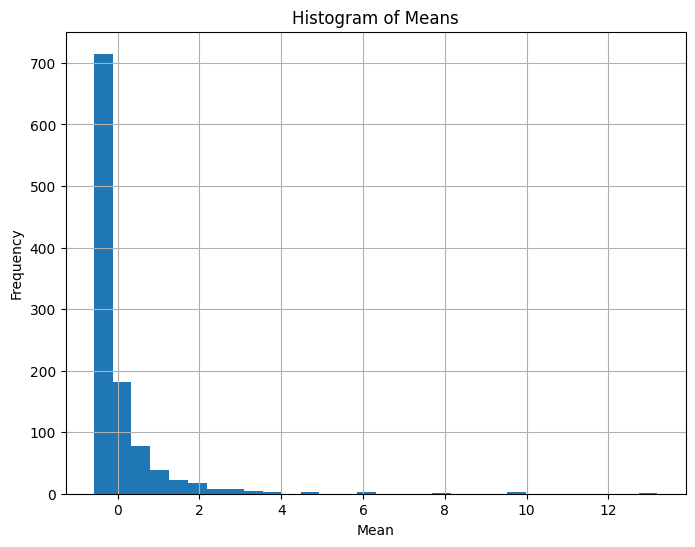

In [ ]:

# Assuming `features` is your list of features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)# Extract standard deviations
std_devs = [feature[1] for feature in features_normalized]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(std_devs, bins=25)
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of Standard Deviations')
plt.grid(True)

# Extract means
means = [feature[0] for feature in features_normalized]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(means, bins=30)
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Means')
plt.grid(True)
plt.show()
plt.show()

#### Se puede ver que la normalizacion no es que cambie mucho los datos

### 4.1.2)Encontrando el numero de clusters al 2D array o la 'tabla'

c:\Users\oscar\anaconda3\envs\all-in-purpose\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oscar\anaconda3\envs\all-in-purpose\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oscar\anaconda3\envs\all-in-purpose\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oscar\anaconda3\envs\all-in-purpose\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

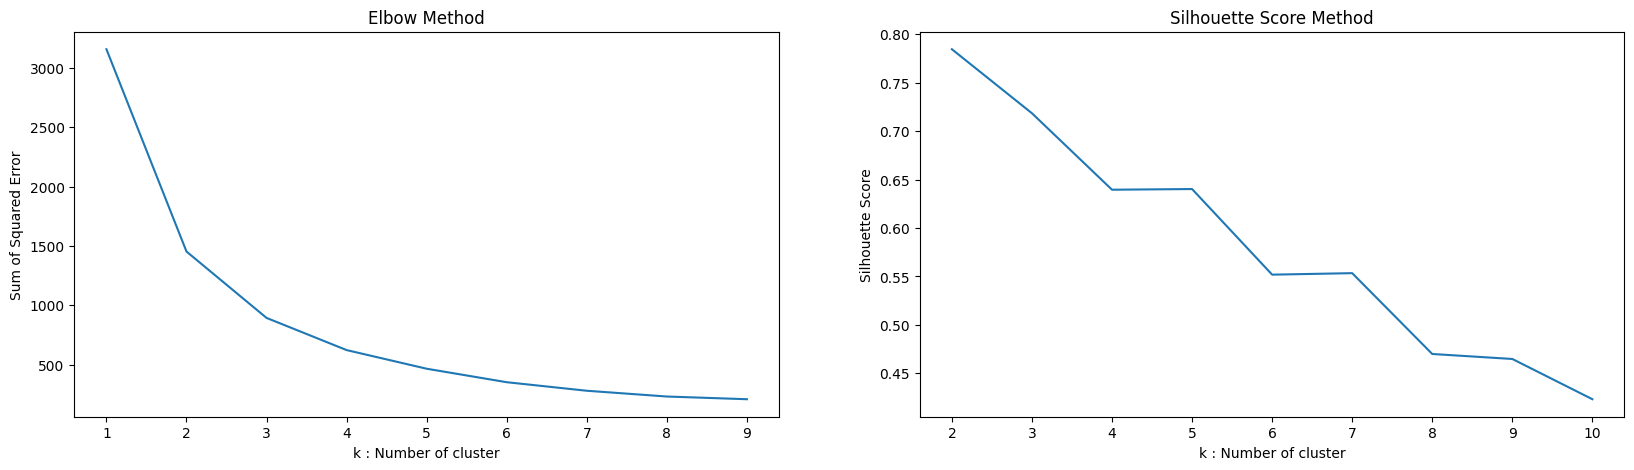

In [ ]:
# Convert features to numpy array, PUEDE SER LAS ORIGINALES O LAS NORMALIZADAS
X = np.array(features)

#Find the best number of clusters
def plot_cluster_metrics(data, kmax=10):
    """
    Plots the cluster metrics (Sum of Squared Error and Silhouette Score) for different values of k.

    Parameters:
    - data: The input data for clustering. Works with data frames and arrays.
    - kmax: The maximum number of clusters to consider.

    Returns:
    None
    """
    sse = {}
    sil = []
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

    # Elbow Method
    axs[0].set_title('Elbow Method')
    for k in range(1, kmax):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        sse[k] = kmeans.inertia_
    sns.lineplot(x=list(sse.keys()), y=list(sse.values()), ax=axs[0])
    axs[0].set_xlabel("k : Number of cluster")
    axs[0].set_ylabel("Sum of Squared Error")

    # Silhouette Score Method
    axs[1].set_title('Silhouette Score Method')
    for k in range(2, kmax + 1):
        kmeans = KMeans(n_clusters=k).fit(data)
        labels = kmeans.labels_
        sil.append(silhouette_score(data, labels, metric='euclidean'))
    sns.lineplot(x=range(2, kmax + 1), y=sil, ax=axs[1])
    axs[1].set_xlabel("k : Number of cluster")
    axs[1].set_ylabel("Silhouette Score")

    plt.show()

# Call the function with your data
plot_cluster_metrics(X, kmax=10)

### 4.1.3)Aplicamos el algoritmo deseado:

c:\Users\oscar\anaconda3\envs\all-in-purpose\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


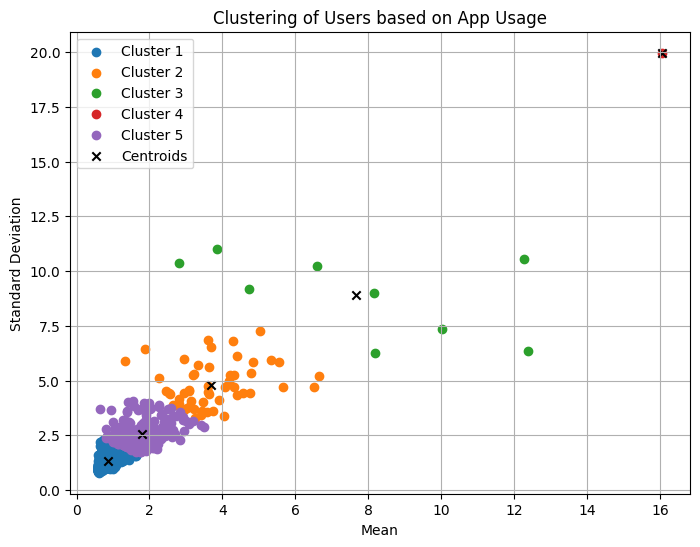

In [ ]:

# Number of clusters
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)
labels = kmeans.labels_

#Hacemos una copia del diccionario para no perder la información y hacemos lo siguiente
hour_dict_with_clabels = hour_dict.copy()

# Add the cluster labels to the dictionary of user arrays
for i, user_id in enumerate(hour_dict_with_clabels.keys()):
    hour_dict_with_clabels[user_id] = (hour_dict_with_clabels[user_id], labels[i])
#each user ID key is associated with a tuple of the form (user_array, cluster_label), where user_array is the array of 
# hours and cluster_label is the cluster label assigned to the user.


# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.title('Clustering of Users based on App Usage')
plt.legend()
plt.grid(True)
plt.show()

## 4.2)Clustering using raw data: Imputation

### 4.2.1)KShape

The K-Shape algorithm uses a shape-based distance measure known as the "Shape-Based Distance" (SBD).

SBD is a measure of similarity between two time series that takes into account both their shapes and their phases. It first normalizes the time series to have zero mean and unit variance, then it aligns them in time to minimize the distance between them.

This makes the K-Shape algorithm particularly suitable for time series clustering, as it can identify clusters of time series that have similar shapes, regardless of their amplitudes or their positions in time.

In [28]:
#NORMALIZATION AND ORGANIZATION OF DATA BEFORE CLUSTERING??
#los datos deben estar organizados de manera cronologica y la misma longitud 

# Example time series data stored in a dictionary
time_series_data = {
    'user1': np.array([100, 200, 300, 400, 500]),
    'user2': np.array([1, 4, 9, 16]),
    'user3': np.array([3, 6, 9, 12, 15]),
    'user4': np.array([100,105,120,98,99])
}

# Convert dictionary values to a list of numpy arrays
X = [v.reshape(-1, 1) for v in time_series_data.values()]
#[array([[100],
#       [200],
#      [300],
#     [400],
#    [500]]),
#...


#Nesecitamos imputar datos faltantes o hacer un resampleo para que tengan la misma longitud
# Padding or resampling to a fixed length, fill with zeros 
max_length = max(len(x) for x in X)
X_padded = pad_sequences(X, maxlen=max_length, padding='post', dtype='float32')

# Convert to numpy array
X_padded = np.array(X_padded)#tiene la misma forma que X

#Calculating the best number of clusters
#?
#?


# Initialize and fit KShape clustering, with 3 clusters
ks = KShape(n_clusters=3, n_init=10, random_state=0)
ks.fit(X_padded)

# Get cluster labels
labels = ks.labels_

#Hacemos una copia del diccionario para no perder la información y guardamos el cluster al cual pertenece cada usuario
time_series_data_labels = time_series_data.copy()

# Add the cluster labels to the dictionary of time_series_data_labels
for i, user_id in enumerate(time_series_data_labels.keys()):
    time_series_data_labels[user_id] = (time_series_data_labels[user_id], labels[i])
#each user ID key is associated with a tuple of the form (user_array, cluster_label), where user_array is the array of 
# hours and cluster_label is the cluster label assigned to the user.


#Lode arriba es lo que pienso aplicar 

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x0000024033CAFBA0>
Traceback (most recent call last):
  File "c:\Users\oscar\anaconda3\envs\all-in-purpose\Lib\site-packages\llvmlite\binding\executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 
Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x0000024033CAFBA0>
Traceback (most recent call last):
  File "c:\Users\oscar\anaconda3\envs\all-in-purpose\Lib\site-packages\llvmlite\binding\executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 


In [ ]:
time_series_data_labels

{'user1': (array([100, 200, 300, 400, 500]), 2),
 'user2': (array([ 1,  4,  9, 16]), 0),
 'user3': (array([ 3,  6,  9, 12, 15]), 2),
 'user4': (array([100, 105, 120,  98,  99]), 2)}

### 4.2.3)Time-series-kmeans

#### Primero el numero de clusters

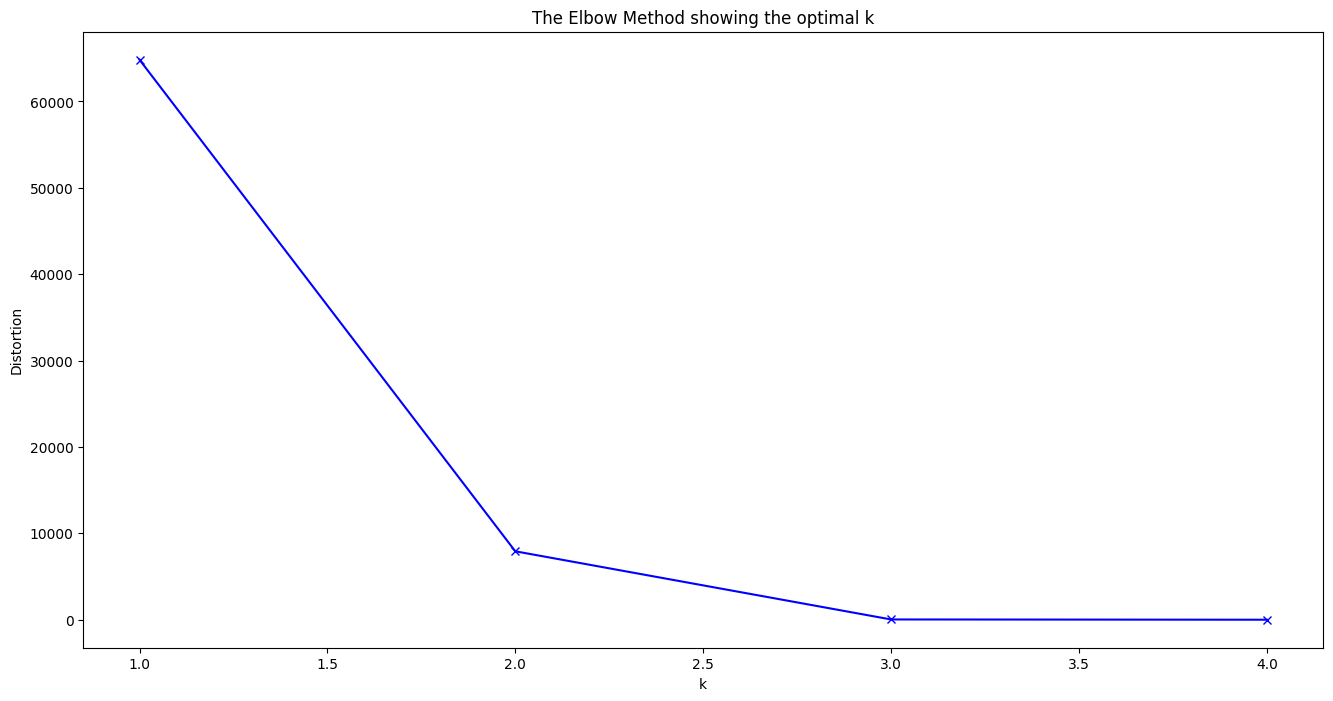

In [18]:
#NORMALIZATION AND ORGANIZATION OF DATA BEFORE CLUSTERING??


# Example time series data stored in a dictionary
time_series_data = {
    'user1': np.array([100, 200, 300, 400, 500]),
    'user2': np.array([1, 4, 9, 16]),
    'user3': np.array([3, 6, 9, 12, 15]),
    'user4': np.array([100, 105, 120, 98, 99])
}

# Convert dictionary values to a list of numpy arrays
X = [v.reshape(-1, 1) for v in time_series_data.values()]


#Necesitamos imputar datos faltantes 
# Padding or resampling to a fixed length, fill with zeros 
max_length = max(len(x) for x in X)
X_padded = pad_sequences(X, maxlen=max_length, padding='post', dtype='float32')

# Convert to numpy array
X_padded = np.array(X_padded)

# Calculo para saber el numero de clusters
distortions = []
K = range(1,10) # Change this range according to your needs

for k in K:
    km_dtw = TimeSeriesKMeans(n_clusters=k, metric="dtw", random_state=0)
    km_dtw.fit(X_padded)
    distortions.append(km_dtw.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
X_padded

array([[[100.],
        [200.],
        [300.],
        [400.],
        [500.]],

       [[  1.],
        [  4.],
        [  9.],
        [ 16.],
        [  0.]],

       [[  3.],
        [  6.],
        [  9.],
        [ 12.],
        [ 15.]],

       [[100.],
        [105.],
        [120.],
        [ 98.],
        [ 99.]]], dtype=float32)

In [ ]:
#NORMALIZATION AND ORGANIZATION OF DATA BEFORE CLUSTERING??


# Example time series data stored in a dictionary
time_series_data = {
    'user1': np.array([100, 200, 300, 400, 500]),
    'user2': np.array([1, 4, 9, 16]),
    'user3': np.array([3, 6, 9, 12, 15]),
    'user4': np.array([100, 105, 120, 98, 99])
}

# Convert dictionary values to a list of numpy arrays
X = [v.reshape(-1, 1) for v in time_series_data.values()]


#Necesitamos imputar datos faltantes 
# Padding or resampling to a fixed length, fill with zeros 
max_length = max(len(x) for x in X)
X_padded = pad_sequences(X, maxlen=max_length, padding='post', dtype='float32')

# Convert to numpy array
X_padded = np.array(X_padded)

#Calculating the best number of clusters
#?
#?



# Initialize and fit TimeSeriesKMeans clustering with DTW metric
km_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
km_dtw.fit(X_padded)

# Get cluster labels
labels_dtw = km_dtw.labels_

# Print cluster labels
for i, label in enumerate(labels_dtw):
    print(f"User {list(time_series_data.keys())[i]}: Cluster {label}")


#Hacemos una copia del diccionario para no perder la información y guardamos el cluster al cual pertenece cada usuario
time_series_data_labels = time_series_data.copy()

# Add the cluster labels to the dictionary of time_series_data_labels
for i, user_id in enumerate(time_series_data_labels.keys()):
    time_series_data_labels[user_id] = (time_series_data_labels[user_id], labels_dtw[i])
#each user ID key is associated with a tuple of the form (user_array, cluster_label), where user_array is the array of 
# hours and cluster_label is the cluster label assigned to the user.

User user1: Cluster 0
User user2: Cluster 1
User user3: Cluster 1
User user4: Cluster 2


In [ ]:
time_series_data_labels

{'user1': (array([100, 200, 300, 400, 500]), 0),
 'user2': (array([ 1,  4,  9, 16]), 1),
 'user3': (array([ 3,  6,  9, 12, 15]), 1),
 'user4': (array([100, 105, 120,  98,  99]), 2)}

## 4.3)Clustering Original raw data

### 4.3.1)DTW with Hierarchical clustering:

Dynamic Time Warping (DTW): This is a method for measuring similarity between two temporal sequences, which may vary in speed. For instance, similarities in walking patterns could be detected using DTW, even if one person was walking faster than the other.  It's often used in time series classification and clustering

Longest Common Subsequence (LCSS): This is a measure of similarity between two sequences that takes into account the order of the elements, but not their exact position. It can be used to compare time series of different lengths.

Global Alignment Kernels: These are a family of methods for comparing time series of different lengths. They work by aligning the time series in a way that maximizes their similarity.

Sequence Embedding: Another approach is to transform your sequences into fixed-length vectors using an embedding method, such as Word2Vec or Doc2Vec, and then use any standard method on the embedded vectors.

Remember that the choice of method depends on the specific requirements of your analysis and the characteristics of your data. It's often a good idea to try multiple methods and see which one works best for your data.

#### Primero el numero de clusters

{'user1': array([100, 200, 300, 400, 500]), 'user2': array([ 1,  4,  9, 16, 25]), 'user3': array([ 3,  6,  9, 12,  0]), 'user4': array([100, 105, 120,  98,  99])}


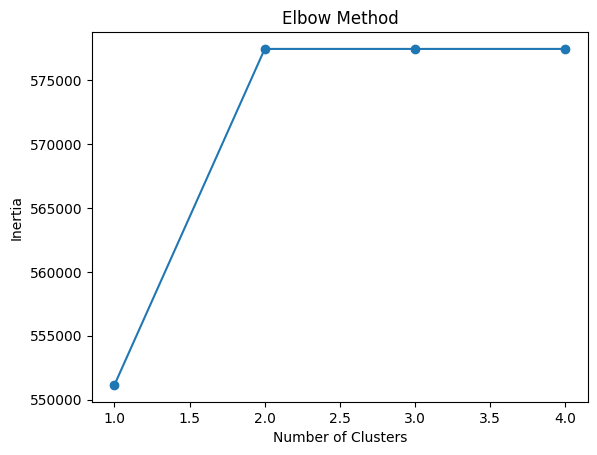

In [17]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# Example time series data stored in a dictionary
time_series_data = {
    'user1': np.array([100, 200, 300, 400, 500]),
    'user2': np.array([1, 4, 9, 16, 25]),
    'user3': np.array([3, 6, 9, 12]),
    'user4': np.array([100, 105, 120, 98, 99])
}
#Because the arrays have diferent length we need to modify them to have the same length and fill missing values with 0
# Calculate the maximum length of the arrays
max_length = max(len(arr) for arr in time_series_data.values())

# Modify the arrays to have the same length and fill missing values with 0
for key in time_series_data.keys():
    arr = time_series_data[key]
    if len(arr) < max_length:
        time_series_data[key] = np.pad(arr, (0, max_length - len(arr)), mode='constant')

# Print the modified time series data
print(time_series_data)


# Calculate pairwise DTW distances
distance_matrix = np.zeros((len(time_series_data), len(time_series_data)))
keys = list(time_series_data.keys())
for i, key1 in enumerate(keys):
    for j, key2 in enumerate(keys):
        if i != j:
            distance_matrix[i, j] = dtw(time_series_data[key1], time_series_data[key2])

# Hierarchical clustering
linkage_matrix = linkage(squareform(distance_matrix), method='single')

# Calculate inertia for different number of clusters
inertia = []
threshold_range = range(1, len(time_series_data) + 1)
for threshold in threshold_range:
    labels = fcluster(linkage_matrix, threshold, criterion='maxclust')
    cluster_centers = np.array([time_series_data[keys[i]] for i in np.unique(labels)])
    inertia.append(np.sum([np.sum((time_series_data[keys[i]] - cluster_centers[labels[i]-1])**2) for i in range(len(keys))]))

# Plot elbow curve
plt.plot(threshold_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

User user1: Cluster 3
User user2: Cluster 1
User user3: Cluster 1
User user4: Cluster 2
3


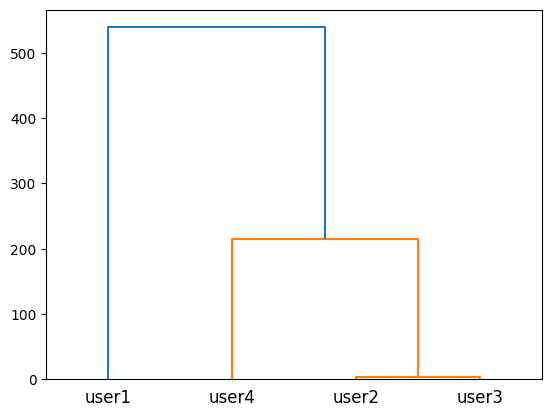

In [11]:

# Example time series data stored in a dictionary
time_series_data = {
    'user1': np.array([100, 200, 300, 400, 500]),
    'user2': np.array([1, 4, 9, 16]),
    'user3': np.array([3, 6, 9, 12, 15]),
    'user4': np.array([100, 105, 120, 98, 99])
}

# Calculate pairwise DTW distances
distance_matrix = np.zeros((len(time_series_data), len(time_series_data)))
keys = list(time_series_data.keys())
for i, key1 in enumerate(keys):
    for j, key2 in enumerate(keys):
        if i != j:
            distance_matrix[i, j] = dtw(time_series_data[key1], time_series_data[key2])

# Hierarchical clustering
linkage_matrix = linkage(squareform(distance_matrix), method='single')

# Plot dendrogram

dendrogram(linkage_matrix, labels=keys, truncate_mode='lastp', p=6)#Se recomuenda que p sea el numeor de clusters que formo + 1
#dendrogram(linkage_matrix, labels=keys)

# Get cluster labels
#threshold = 200  # Adjust as needed
#cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')

num_clusters = 6
cluster_labels = fcluster(linkage_matrix, t=num_clusters, criterion='distance')
#'maxclust'was the criterion, need to check why it works beter with distances

# Print cluster labels
for i, label in enumerate(cluster_labels):
    print(f"User {keys[i]}: Cluster {label}")
    
time_series_data_labels = time_series_data.copy()

# Add the cluster labels to the dictionary of time_series_data_labels
for i, user_id in enumerate(time_series_data_labels.keys()):
    time_series_data_labels[user_id] = (time_series_data_labels[user_id], cluster_labels[i])
#each user ID key is associated with a tuple of the form (user_array, cluster_label), where user_array is the array of 
# hours and cluster_label is the cluster label assigned to the user.

# Get the number of unique cluster labels
num_clusters = len(np.unique(cluster_labels))
print(num_clusters)

#### HMM

In [ ]:
import numpy as np
from hmmlearn import hmm

time_series_data = {
    'user1': np.array([100, 200, 300, 400, 500]),
    'user2': np.array([1, 4, 9, 16]),
    'user3': np.array([3, 6, 9, 12, 15]),
    'user4': np.array([100, 105, 120, 98, 99])
}
models = {}

for user, times in time_series_data.items():
    # Reshape the data to fit the model
    times = times.reshape(-1, 1)
    
    # Create and fit an HMM
    model = hmm.GaussianHMM(n_components=2, covariance_type="full")
    model.fit(times)
    
    models[user] = model